In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AAPL/AAPL.csv')


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,25-06-1990,0.370536,0.372768,0.359375,0.368304,0.294235,122001600
1,26-06-1990,0.372768,0.375000,0.360491,0.362723,0.289777,127254400
2,27-06-1990,0.363839,0.375000,0.359375,0.370536,0.296018,97227200
3,28-06-1990,0.381696,0.386161,0.372768,0.383929,0.306718,249939200
4,29-06-1990,0.383929,0.400670,0.381696,0.399554,0.319201,325192000


In [ ]:
df.shape

(8313, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8313 entries, 0 to 8312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8313 non-null   object 
 1   Open       8313 non-null   float64
 2   High       8313 non-null   float64
 3   Low        8313 non-null   float64
 4   Close      8313 non-null   float64
 5   Adj Close  8313 non-null   float64
 6   Volume     8313 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 454.7+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8.313000e+03
mean,23.225139,23.487828,22.972143,23.241308,22.337854,3.719507e+08
std,41.796156,42.294148,41.333862,41.838856,41.511711,3.621699e+08
min,0.114955,0.118304,0.113839,0.115513,0.098179,2.396800e+06
25%,0.381696,0.388393,0.372768,0.381696,0.319820,1.361024e+08
50%,3.031071,3.071786,2.993571,3.029643,2.575023,2.553432e+08
75%,25.572500,25.735001,25.342501,25.565001,23.180744,4.682272e+08
max,186.729996,187.559998,185.009995,187.000000,187.000000,7.421641e+09


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-17-b9c6864122be>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.drop_duplicates(inplace=True)

<Axes: >

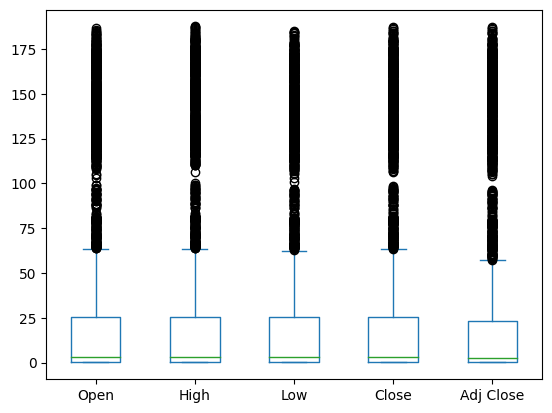

In [ ]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
def style():
    plt.figure(facecolor='white',figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x',color='white')
    ax.tick_params(axis='y',color='white')

    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')

    ax.set_facecolor('black')

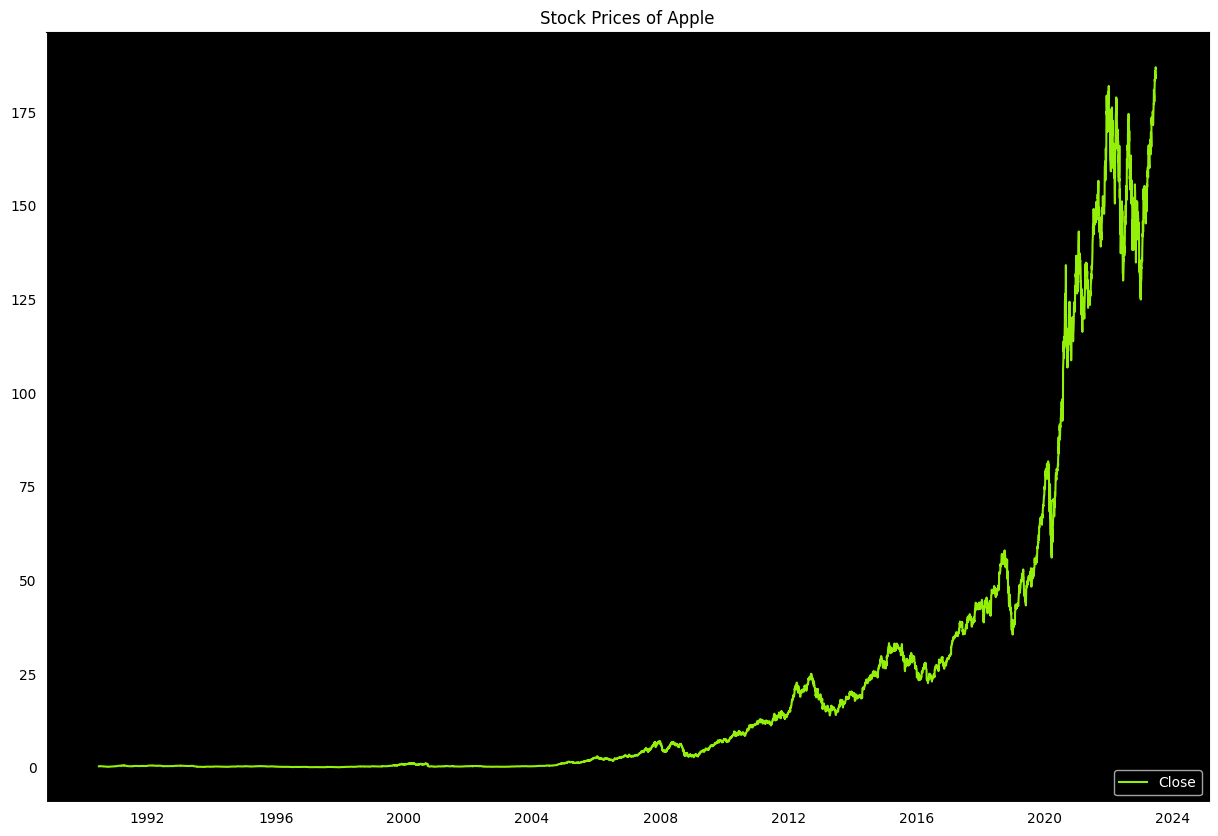

In [ ]:
style()

plt.title('Stock Prices of Apple')
plt.plot(df.Date,df.Close,color='#94F008')
plt.legend(['Close'],loc='lower right',facecolor='black',labelcolor='white')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [ ]:
train, test = train_test_split(df,test_size=0.2)

In [ ]:
test_pred = test.copy()

In [ ]:
X_train = train[['Open','High','Low','Volume']].values
X_test = test[['Open','High','Low','Volume']].values

In [ ]:
y_train = train['Close']
y_test = test['Close']

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.predict([[0.126116,0.126674,0.126116,48630400]])

array([0.12521497])

In [ ]:
print('MSE:',round(mean_squared_error(y_test,y_pred),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print('R2 Score:',round(r2_score(y_test,y_pred),3))

MSE: 0.084
MAE: 0.11
RMSE: 0.29
R2 Score: 1.0


In [ ]:
data = pd.DataFrame(df[['Date','Close']])
data = data.reset_index()
data = data.drop('index',axis=1)
data.set_index('Date',inplace=True)
data = data.asfreq('D')
data

,Close
Date,
1990-06-25,0.368304
1990-06-26,0.362723
1990-06-27,0.370536
1990-06-28,0.383929
1990-06-29,0.399554
...,...
2023-06-19,NaN
2023-06-20,185.009995
2023-06-21,183.960007


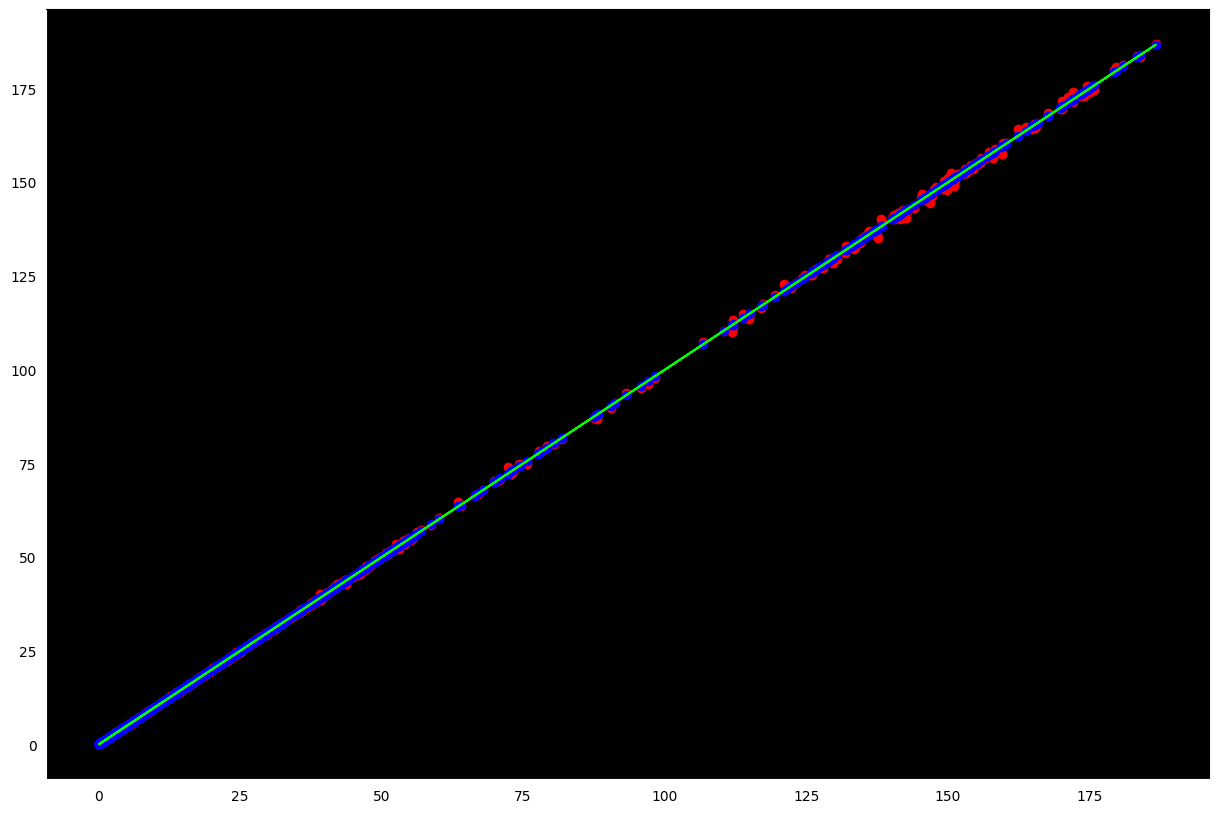

In [ ]:
style()

plt.scatter(y_test,y_pred , color='red',marker='o')
plt.scatter(y_test,y_test,color='blue')
plt.plot(y_test,y_test,color='lime')